In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid')

auto = pd.read_csv('Auto.csv')
tab = auto.copy()

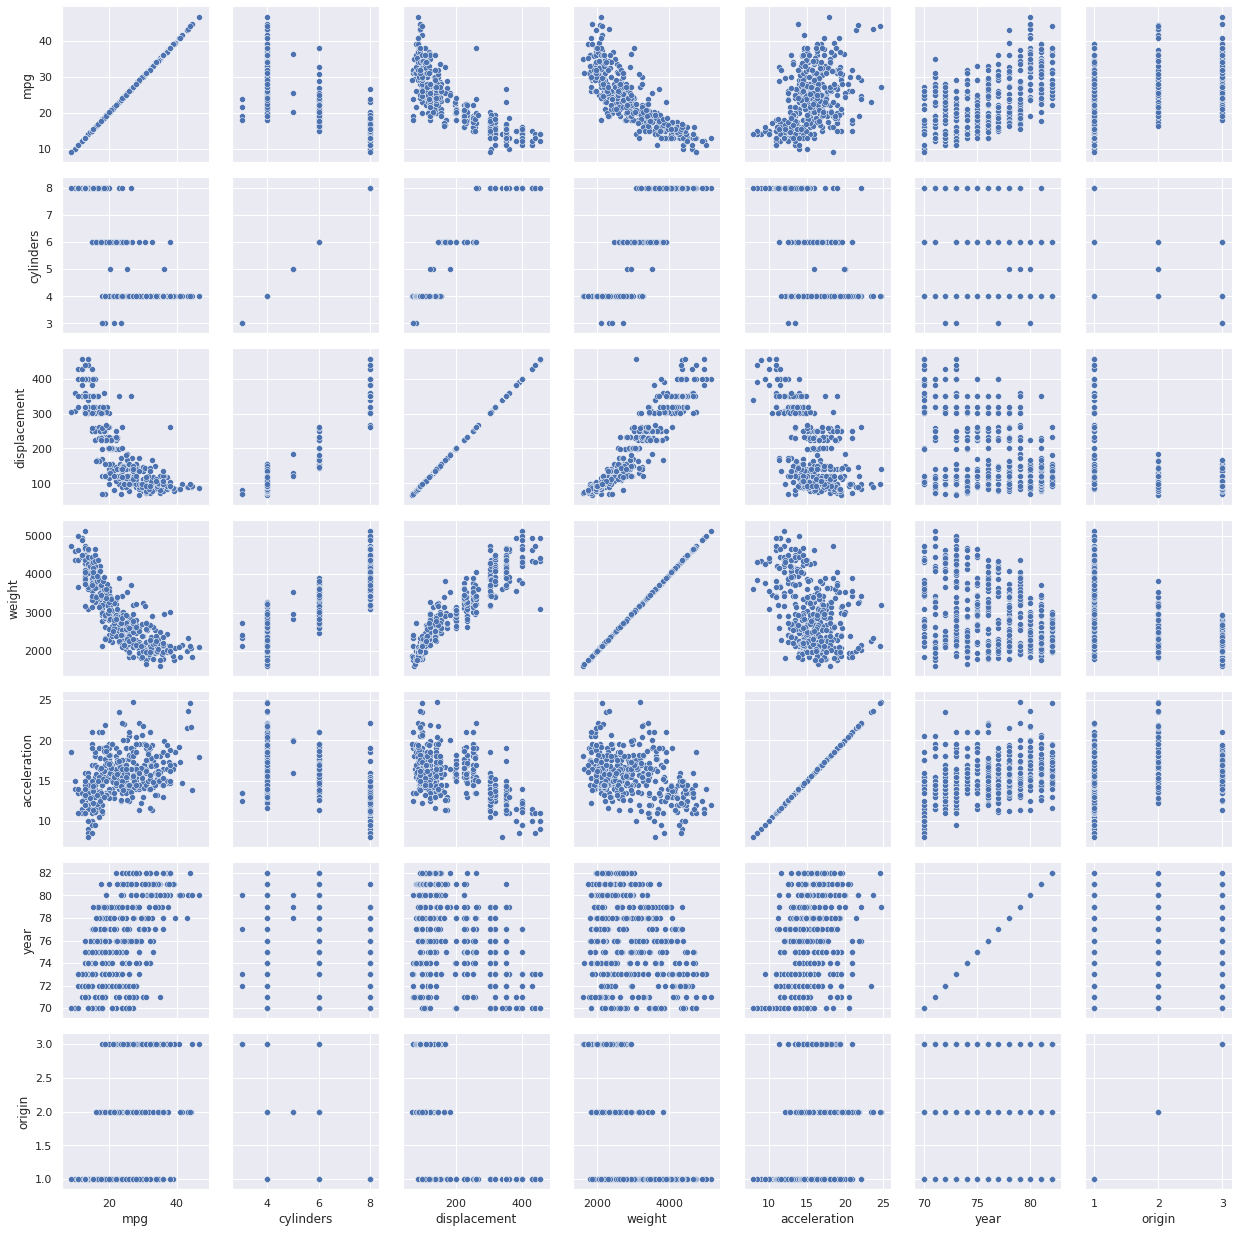

In [2]:
#a)
g = sns.PairGrid(tab)
g.map(sns.scatterplot)

In [3]:
#b)
print(tab.corr())

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.776260     -0.804443 -0.831739      0.422297   
cylinders    -0.776260   1.000000      0.950920  0.897017     -0.504061   
displacement -0.804443   0.950920      1.000000  0.933104     -0.544162   
weight       -0.831739   0.897017      0.933104  1.000000     -0.419502   
acceleration  0.422297  -0.504061     -0.544162 -0.419502      1.000000   
year          0.581469  -0.346717     -0.369804 -0.307900      0.282901   
origin        0.563698  -0.564972     -0.610664 -0.581265      0.210084   

                  year    origin  
mpg           0.581469  0.563698  
cylinders    -0.346717 -0.564972  
displacement -0.369804 -0.610664  
weight       -0.307900 -0.581265  
acceleration  0.282901  0.210084  
year          1.000000  0.184314  
origin        0.184314  1.000000  


In [4]:
#c)
tab = tab.loc[tab['horsepower']!='?']
c = pd.to_numeric(tab['horsepower'])
tab['horsepower'] = c
X = tab.drop(['name','mpg'], axis=1)
X = sm.add_constant(X)
Y = tab['mpg']

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          2.04e-139
Time:                        10:39:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

<ipython-input-4-00d9bcf750b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['horsepower'] = c


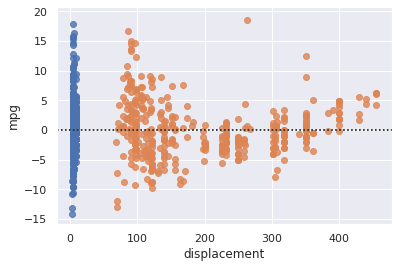

In [6]:
#d)
g2 = sns.residplot(data = tab, x = tab.cylinders, y = tab.mpg)
g3 = sns.residplot(data = tab, x  = tab.displacement, y = tab.mpg)

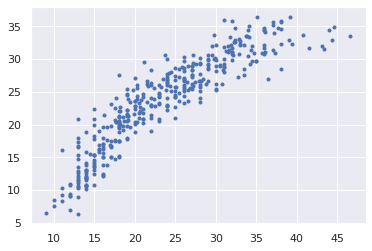

In [7]:
plt.plot(Y, predictions, '.')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     291.1
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          2.75e-149
Time:                        10:48:57   Log-Likelihood:                -1000.2
No. Observations:                 392   AIC:                             2016.
Df Residuals:                     384   BIC:                             2048.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -11

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


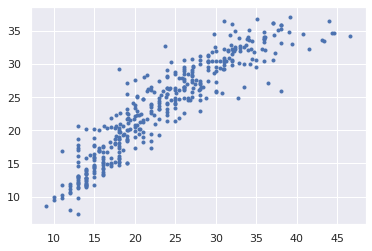

In [10]:
#e)
res1 = smf.ols(formula = 'mpg~cylinders*displacement+weight+acceleration+year+origin', data = tab).fit()
print(res1.summary())
X_ = tab[['cylinders', 'displacement']]
pred_ = res1.predict(X)
plt.plot(Y, pred_, '.')